In [84]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts

In [85]:
df_CENIPA = pd.read_csv("https://raw.githubusercontent.com/SouzaAllan/ESTUDO_CENIPA_2010-2019/main/PROJETO%20V2/ocorrencias_cenipa.csv", sep=';', encoding='latin-1')

In [86]:
print('Colunas exixtentes no data frame :{}'.format(df_CENIPA.columns.values)) #valores das colunas

df_CENIPA.head()# 5 primeiras linhas


Colunas exixtentes no data frame :['codigo' 'tipo' 'descricao' 'cidade' 'estado' 'data' 'ano' 'hora'
 'aeronave_liberada' 'status_investigacao' 'aeronaves_envolvidas'
 'ocorrencia_saida_pista' 'aeronave_tipo' 'aeronave_fabricante'
 'motor_tipo' 'aeronave_motor_quantidade' 'aeronave_assentos'
 'aeronave_ano_fabricacao' 'aeronave_pais_fabricante'
 'aeronave_fase_operacao' 'aeronave_nivel_dano']


,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,12/01/2010,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,08/04/2010,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,19/03/2010,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,21/03/2010,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,10/03/2010,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


In [87]:
df_CENIPA['quantidade'] = 1 #criando uma coluna para deixar o groupby visual

In [88]:
df_CENIPA.loc[:, (df_CENIPA != 0).any(axis=0)]


,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano,quantidade
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,12/01/2010,2010,14:30:00,SIM,FINALIZADA,...,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE,1
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,08/04/2010,2010,14:20:00,SIM,FINALIZADA,...,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL,1
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,19/03/2010,2010,19:30:00,SIM,FINALIZADA,...,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL,1
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,21/03/2010,2010,20:45:00,SIM,FINALIZADA,...,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA,1
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,10/03/2010,2010,17:20:00,SIM,FINALIZADA,...,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,79117,ACIDENTE,INDETERMINADO,ASSIS BRASIL,AC,23/10/2019,2019,15:00:00,SIM,FINALIZADA,...,INDETERMINADO,FABRICANTE DESCONHECIDO,INDETERMINADO,INDETERMINADO,0,0,BRASIL,INDETERMINADO,DESTRUÍDA,1
5238,79119,ACIDENTE,INDETERMINADO,SÃO JOSÉ DO RIO CLARO,MT,11/10/2019,2019,10:00:00,SIM,FINALIZADA,...,INDETERMINADO,FABRICANTE DESCONHECIDO,INDETERMINADO,INDETERMINADO,0,0,BRASIL,INDETERMINADO,DESTRUÍDA,1
5239,79123,ACIDENTE,INDETERMINADO,ANTONINA,PR,21/09/2019,2019,18:30:00,SIM,FINALIZADA,...,TRIKE,INDETERMINADO,INDETERMINADO,SEM TRAÇÃO,0,0,BRASIL,DECOLAGEM,SUBSTANCIAL,1
5240,79203,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FLORIANÓPOLIS,SC,20/12/2019,2019,16:37:00,SIM,FINALIZADA,...,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,2,1980,BRASIL,CORRIDA APÓS POUSO,LEVE,1


# Analise de Dados como principal fonte coluna TIPO
* Contém estudos estatisticos como média, moda e desvio padrão. Além de média de determinado tipo de ocorrência por estado, agrupamento de dados por estado e tipo de ocorrência. Por fim dois gráficos, um demonstrando as informações de tipo de ocorrência por estado, e outro o total de ocorrências dividio por tipo. 

INCIDENTE          2887
ACIDENTE           1694
INCIDENTE GRAVE     661
Name: tipo, dtype: int64

A média por tipo de ocorrências é: 1747.3333333333333

A moda por tipo de ocorrências é: INCIDENTE

O desvio padrão por tipo de ocorrências é: 1113.9579585124984



O total de acidentes é de 1694

A média de acidentes é de 62.74074074074074 por estado



O total de incidentes é de 2887

A média de incidentes é de 106.92592592592592 por estado



O total de incidentes graves é de 661

A média de incidentes graves é de 24.48148148148148 por estado



TOP 10 Tipos de Ocorrências por Estado


,,quantidade
estado,tipo,
SP,INCIDENTE,759
RJ,INCIDENTE,367
SP,ACIDENTE,357
MG,INCIDENTE,287
PR,INCIDENTE,254
RS,ACIDENTE,159
MT,ACIDENTE,147
PR,ACIDENTE,136
MG,ACIDENTE,127


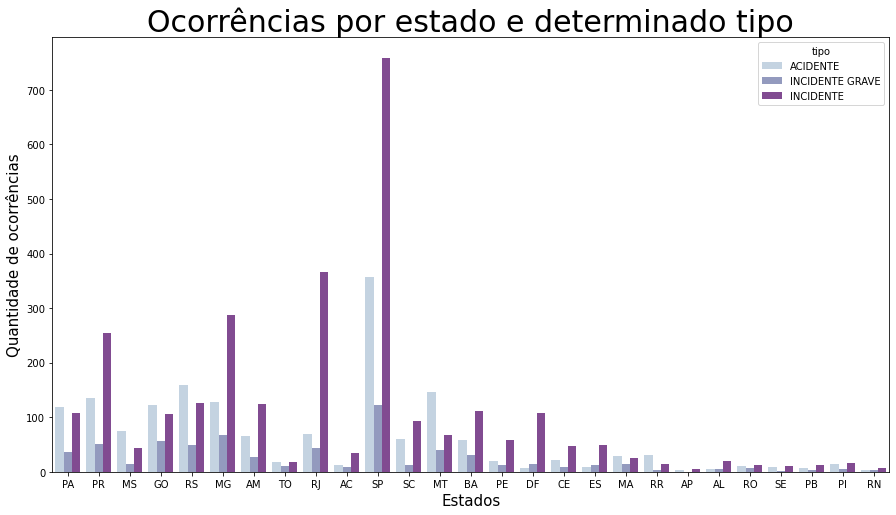

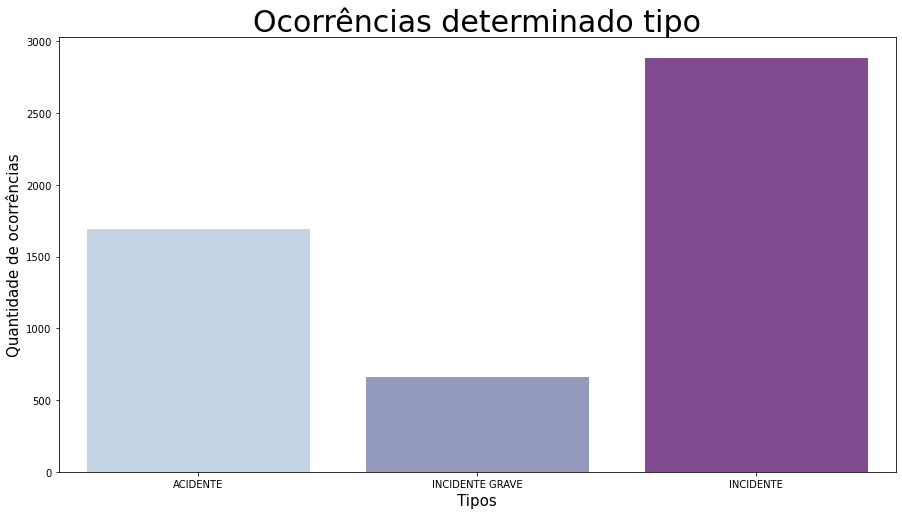

In [89]:
coluna_tipo = df_CENIPA['tipo']
incac_tipo = coluna_tipo.value_counts()

media_tipo = incac_tipo.mean()

moda_tipo = sts.mode(coluna_tipo)

desvio_tipo = sts.stdev(incac_tipo)


qtde_estados = df_CENIPA['estado'].value_counts()

acidentes = df_CENIPA[df_CENIPA['tipo'] == 'ACIDENTE']#FILTRANDO A VARIAVEL TIPO PARA ACIDENTES
qtde_acidentes = int(acidentes.shape[0])#SELECIONANDO O TOTAL DE ACIDENTES

media_acidentes = qtde_acidentes / qtde_estados.shape[0] #CALCULANDO A MÉDIA DE ACIDENTES POR ANO 


incidentes = df_CENIPA[df_CENIPA['tipo'] == 'INCIDENTE']#FILTRANDO A VARIAVEL TIPO PARA INCIDENTES
qtde_incidentes = int(incidentes.shape[0])

media_incidentes = qtde_incidentes / qtde_estados.shape[0]


incidentesGraves = df_CENIPA[df_CENIPA['tipo'] == 'INCIDENTE GRAVE']#FILTRANDO A VARIAVEL TIPO PARA INCIDENTES GRAVES
qtde_incidentesGraves = int(incidentesGraves.shape[0])

media_incidentesGraves = qtde_incidentesGraves / qtde_estados.shape[0]



plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='estado', hue = 'tipo', palette = 'BuPu')

plt.xlabel('Estados', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências', fontdict={'fontsize': 15})

plt.title('Ocorrências por estado e determinado tipo', fontdict={'fontsize': 30})


plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='tipo', palette = 'BuPu')

plt.xlabel('Tipos', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências', fontdict={'fontsize': 15})

plt.title('Ocorrências determinado tipo', fontdict={'fontsize': 30})

print(incac_tipo)
print('')
print('A média por tipo de ocorrências é: {}'.format(media_tipo))
print('')
print('A moda por tipo de ocorrências é: {}'.format(moda_tipo))
print('')
print('O desvio padrão por tipo de ocorrências é: {}'.format(desvio_tipo))
print('')
print('')
print('')
print('O total de acidentes é de {}'.format(qtde_acidentes))
print('')
print('A média de acidentes é de {} por estado'.format(media_acidentes))
print('')
print('')
print('')
print('O total de incidentes é de {}'.format(qtde_incidentes))
print('')
print('A média de incidentes é de {} por estado'.format(media_incidentes))
print('')
print('')
print('')
print('O total de incidentes graves é de {}'.format(qtde_incidentesGraves))
print('')
print('A média de incidentes graves é de {} por estado'.format(media_incidentesGraves))
print('')
print('')
print('')
print('TOP 10 Tipos de Ocorrências por Estado')
df_CENIPA.groupby(['estado', 'tipo']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

FALHA DO MOTOR EM VOO                                 632
ESTOURO DE PNEU                                       566
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE    540
PERDA DE CONTROLE NO SOLO                             427
PERDA DE CONTROLE EM VOO                              333
                                                     ... 
IMC NÃO INTENCIONAL                                     1
HIPÓXIA                                                 1
EXPLOSÃO                                                1
PERDA DE SEPARAÇÃO / COLISÃO EM VOO                     1
RELACIONADO COM SECURITY                                1
Name: descricao, Length: 75, dtype: int64

A média por descrição de ocorrências é: 69.89333333333333

A moda por descrição de ocorrências é: FALHA DO MOTOR EM VOO

O desvio padrão por descrição de ocorrências é: 134.25797810441168


TOP 10 Tipos de Ocorrências Dividas por Descricao


quantidade
tipo            descricao                                                     
INCIDENTE       ESTOURO DE PNEU                                            551
                FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE         465
ACIDENTE        PERDA DE CONTROLE EM VOO                                   321
                FALHA DO MOTOR EM VOO                                      312
INCIDENTE       COLISÃO COM AVE                                            265
                OUTROS                                                     234
                FALHA DO MOTOR EM VOO                                      232
ACIDENTE        PERDA DE CONTROLE NO SOLO                                  215
INCIDENTE       COM TREM DE POUSO                                          136
INCIDENTE GRAVE PERDA DE CONTROLE NO SOLO                                  119

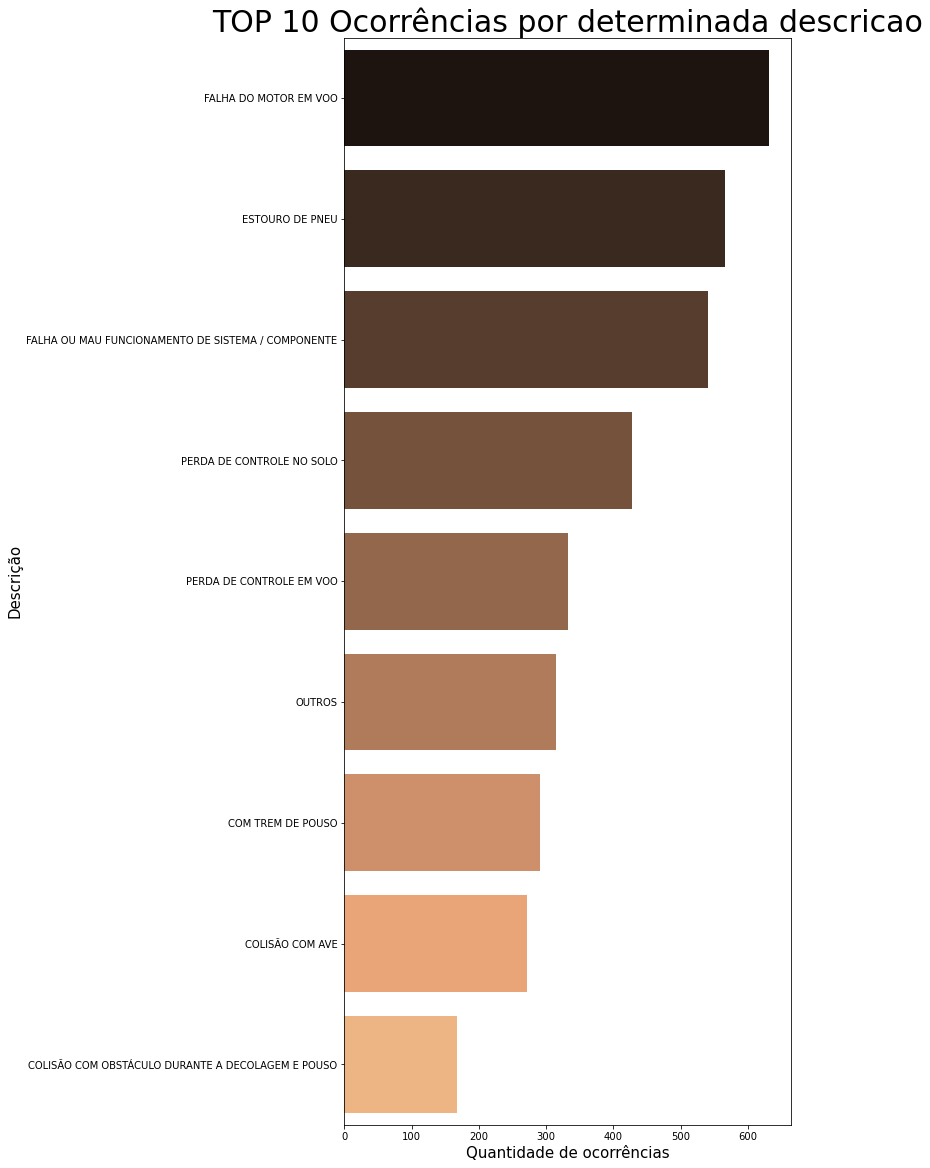

In [90]:
coluna_descricao = df_CENIPA['descricao']
incac_descricao = coluna_descricao.value_counts()

media_descricao = incac_descricao.mean()

moda_descricao = sts.mode(coluna_descricao)

desvio_descricao = sts.stdev(incac_descricao)

plt.figure(figsize = (8,20))
sns.countplot(data = df_CENIPA, y ='descricao', order = df_CENIPA['descricao'].value_counts().sort_values(ascending = False).index[0:9], palette='copper')

plt.xlabel('Quantidade de ocorrências', fontdict={'fontsize': 15})
plt.ylabel('Descrição', fontdict={'fontsize': 15})

plt.title('TOP 10 Ocorrências por determinada descricao', fontdict={'fontsize': 30})


print(incac_descricao)
print('')
print('A média por descrição de ocorrências é: {}'.format(media_descricao))
print('')
print('A moda por descrição de ocorrências é: {}'.format(moda_descricao))
print('')
print('O desvio padrão por descrição de ocorrências é: {}'.format(desvio_descricao))
print('')
print('')
print('TOP 10 Tipos de Ocorrências Dividas por Descricao')
df_CENIPA.groupby(['tipo', 'descricao']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

RIO DE JANEIRO        293
SÃO PAULO             252
BELO HORIZONTE        174
GUARULHOS             141
GOIÂNIA               132
                     ... 
PALOTINA                1
GOIOERÊ                 1
BOA VISTA DO TUPIM      1
CURITIBANOS             1
ANGÉLICA                1
Name: cidade, Length: 1042, dtype: int64

A média ocorrências por cidade é: 5.030710172744722

A moda de ocorrências cidade é: RIO DE JANEIRO

O desvio padrão de ocorrências por cidade é: 17.900327552546234


TOP 10 Ocorrências Dividas por Cidade


,,quantidade
estado,cidade,
RJ,RIO DE JANEIRO,293
SP,SÃO PAULO,252
MG,BELO HORIZONTE,174
SP,GUARULHOS,141
GO,GOIÂNIA,132
DF,BRASÍLIA,129
PR,LONDRINA,126
SP,CAMPINAS,123
AM,MANAUS,95


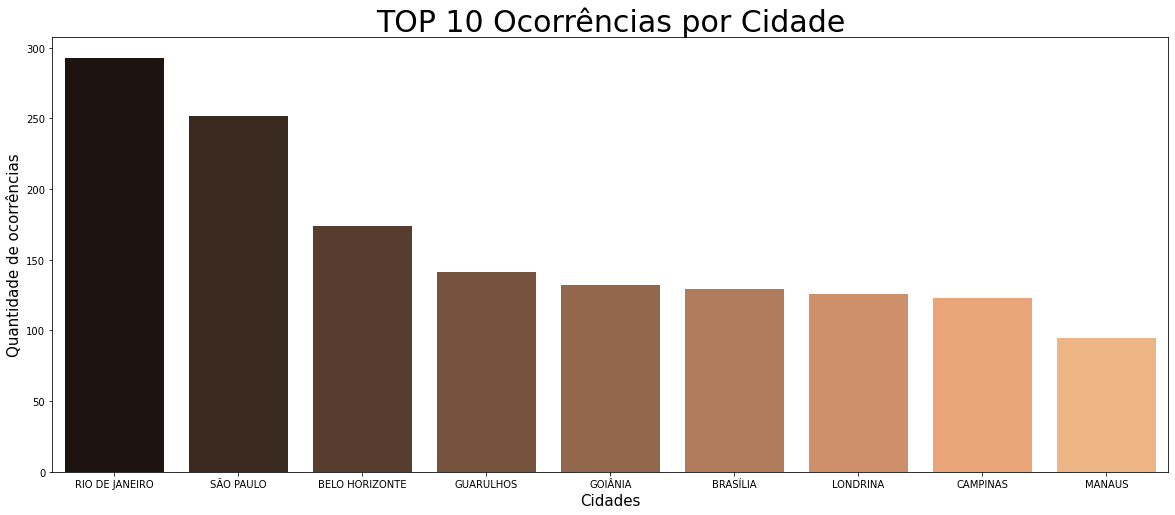

In [91]:
coluna_cidades = df_CENIPA['cidade']
incac_cidades = coluna_cidades.value_counts()

media_cidades= incac_cidades.mean()

moda_cidades = sts.mode(coluna_cidades)

desvio_cidades = sts.stdev(incac_cidades)

plt.figure(figsize = (20,8))
sns.countplot(data = df_CENIPA, x ='cidade',order = df_CENIPA['cidade'].value_counts().sort_values(ascending = False).index[0:9], palette='copper' )

plt.xlabel('Cidades', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências', fontdict={'fontsize': 15})

plt.title('TOP 10 Ocorrências por Cidade', fontdict={'fontsize': 30})


print(incac_cidades)
print('')
print('A média ocorrências por cidade é: {}'.format(media_cidades))
print('')
print('A moda de ocorrências cidade é: {}'.format(moda_cidades))
print('')
print('O desvio padrão de ocorrências por cidade é: {}'.format(desvio_cidades))
print('')
print('')
print('TOP 10 Ocorrências Dividas por Cidade')
df_CENIPA.groupby(['estado', 'cidade']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

SP    1239
MG     482
RJ     480
PR     441
RS     334
GO     286
PA     263
MT     255
AM     217
BA     200
SC     166
MS     132
DF     129
PE      90
CE      78
ES      70
MA      68
AC      54
RR      49
TO      46
PI      36
RO      30
AL      30
PB      23
SE      21
RN      14
AP       9
Name: estado, dtype: int64

A média estadual de ocorrências é: 194.14814814814815

A moda estadual de ocorrências é: SP

O desvio padrão estadual de ocorrências é: 254.6748611470808


TOP 10 Ocorrências Dividas por Ano x Estados


,,quantidade
ano,estado,
2013,SP,158
2012,SP,153
2011,SP,134
2014,SP,133
2015,SP,121
2019,SP,119
2018,SP,111
2010,SP,107
2016,SP,107


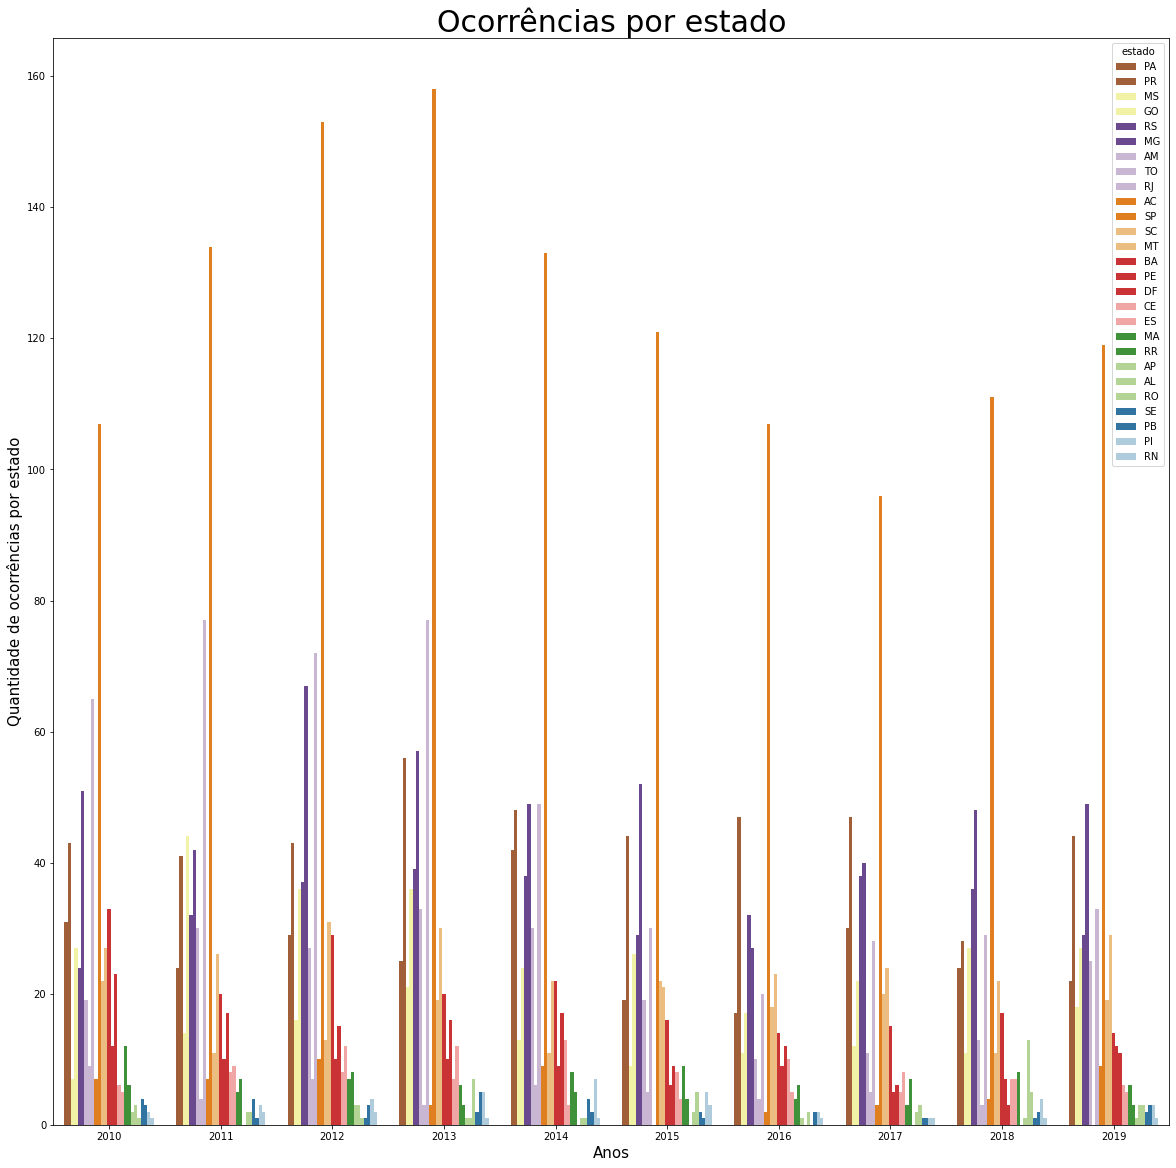

In [92]:
coluna_estados = df_CENIPA['estado']
incac_estados = coluna_estados.value_counts()

media_estados= incac_estados.mean()

moda_estados = sts.mode(coluna_estados)

desvio_estados = sts.stdev(incac_estados)

plt.figure(figsize = (20,20))
sns.countplot(data = df_CENIPA, x ='ano', hue = 'estado', palette = 'Paired_r' )

plt.xlabel('Anos', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências por estado', fontdict={'fontsize': 15})

plt.title('Ocorrências por estado', fontdict={'fontsize': 30})


print(incac_estados)
print('')
print('A média estadual de ocorrências é: {}'.format(media_estados))
print('')
print('A moda estadual de ocorrências é: {}'.format(moda_estados))
print('')
print('O desvio padrão estadual de ocorrências é: {}'.format(desvio_estados))
print('')
print('')
print('TOP 10 Ocorrências Dividas por Ano x Estados')
df_CENIPA.groupby(['ano', 'estado']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

18/12/2013    9
15/07/2011    8
29/12/2011    7
07/08/2019    7
09/02/2014    7
             ..
04/07/2018    1
26/06/2017    1
11/06/2011    1
29/03/2019    1
25/04/2017    1
Name: data, Length: 2697, dtype: int64

A média de ocorrências por dia é: 1.9436410826844641

A moda de ocorrências por dia é: 18/12/2013

O desvio padrão de ocorrências por dia é : 1.0992028141431371


TOP 10 Ocorrências Dividas por Data


quantidade
ano  data                  
2013 18/12/2013           9
2011 15/07/2011           8
     29/12/2011           7
2014 09/02/2014           7
2019 07/08/2019           7
2010 21/04/2010           7
2014 05/07/2014           6
     09/04/2014           6
     12/02/2014           6
2012 24/09/2012           6

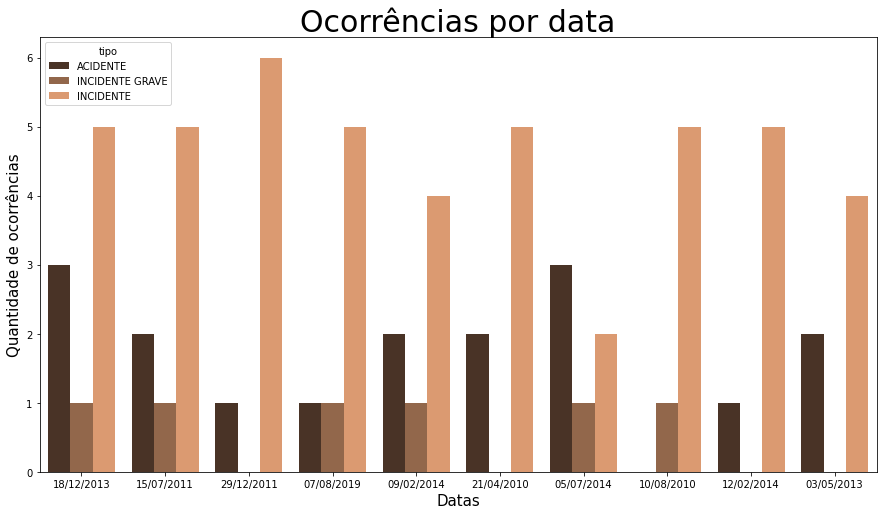

In [93]:
coluna_datas = df_CENIPA['data']
incac_datas = coluna_datas.value_counts()

media_datas= incac_datas.mean()

moda_datas = sts.mode(coluna_datas)

desvio_datas = sts.stdev(incac_datas)

plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='data', hue = 'tipo', order = df_CENIPA['data'].value_counts().sort_values(ascending = False).index[0:10], palette='copper')

plt.xlabel('Datas', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências', fontdict={'fontsize': 15})

plt.title('Ocorrências por data', fontdict={'fontsize': 30})


print(incac_datas)
print('')
print('A média de ocorrências por dia é: {}'.format(media_datas))
print('')
print('A moda de ocorrências por dia é: {}'.format(moda_datas))
print('')
print('O desvio padrão de ocorrências por dia é : {}'.format(desvio_datas))
print('')
print('')
print('TOP 10 Ocorrências Dividas por Data')
df_CENIPA.groupby(['ano', 'data']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

2013    653
2012    647
2011    576
2014    567
2010    552
2019    496
2015    471
2018    443
2017    434
2016    403
Name: ano, dtype: int64

A média anual de ocorrências é: 524.2

A moda anual de ocorrências é: 2013

O desvio padrão anual de ocorrências é: 88.19271826832166


Tipos de Ocorrências Dividas por Ano


quantidade
ano  tipo                       
2010 ACIDENTE                129
     INCIDENTE               362
     INCIDENTE GRAVE          61
2011 ACIDENTE                187
     INCIDENTE               323
     INCIDENTE GRAVE          66
2012 ACIDENTE                206
     INCIDENTE               364
     INCIDENTE GRAVE          77
2013 ACIDENTE                198
     INCIDENTE               386
     INCIDENTE GRAVE          69
2014 ACIDENTE                176
     INCIDENTE               315
     INCIDENTE GRAVE          76
2015 ACIDENTE                171
     INCIDENTE               250
     INCIDENTE GRAVE          50
2016 ACIDENTE                163
     INCIDENTE               191
     INCIDENTE GRAVE          49
2017 ACIDENTE                146
     INCIDENTE               232
     INCIDENTE GRAVE          56
2018 ACIDENTE                166
     INCIDENTE               198
     INCIDENTE GRAVE          79
2019 ACIDENTE                152
     INCIDENTE               266
     INCIDENTE GRAVE          78

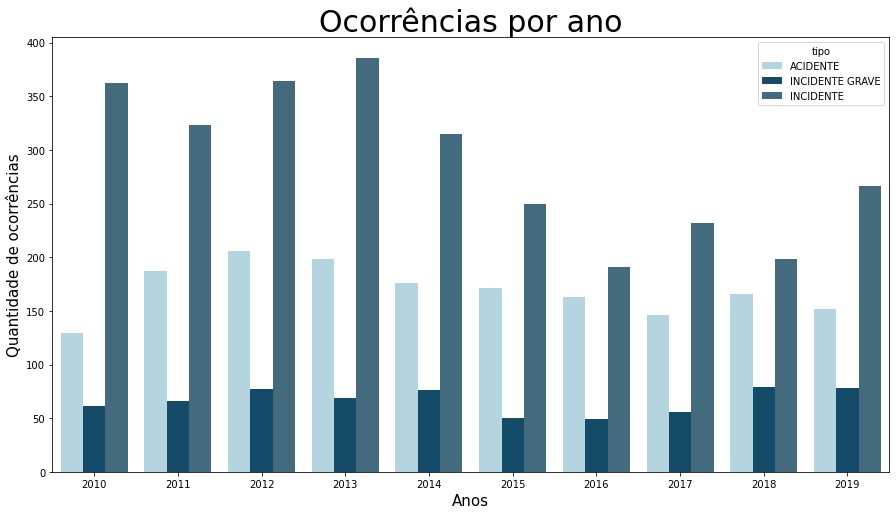

In [94]:
coluna_ano = df_CENIPA['ano']
incac_ano = coluna_ano.value_counts()

media_ano= incac_ano.mean()

moda_ano = sts.mode(coluna_ano)

desvio_ano = sts.stdev(incac_ano)

plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='ano', hue = 'tipo', palette =['#ADD8E6',"#054F77",'#3A6D87'] )

plt.xlabel('Anos', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências', fontdict={'fontsize': 15})

plt.title('Ocorrências por ano', fontdict={'fontsize': 30})


print(incac_ano)
print('')
print('A média anual de ocorrências é: {}'.format(media_ano))
print('')
print('A moda anual de ocorrências é: {}'.format(moda_ano))
print('')
print('O desvio padrão anual de ocorrências é: {}'.format(desvio_ano))
print('')
print('')
print('Tipos de Ocorrências Dividas por Ano')
df_CENIPA.groupby(['ano', 'tipo']).agg({'quantidade':'count'})

00:00:00    160
20:00:00    107
19:00:00     87
13:30:00     81
13:00:00     80
           ... 
11:21:00      1
09:43:00      1
02:08:00      1
12:23:00      1
01:58:00      1
Name: hora, Length: 921, dtype: int64

A média ocorrências  por hora é: 5.691639522258415

A moda de ocorrências  por hora é: 00:00:00

O desvio padrão de ocorrências  por hora é: 12.187414464552527


TOP 10 Ocorrências Dividas por hora e tipo


,,quantidade
hora,tipo,
00:00:00,INCIDENTE,128
20:00:00,ACIDENTE,51
20:30:00,ACIDENTE,46
20:00:00,INCIDENTE,43
19:00:00,ACIDENTE,41
19:30:00,ACIDENTE,40
13:30:00,ACIDENTE,39
18:00:00,ACIDENTE,39
12:00:00,ACIDENTE,38


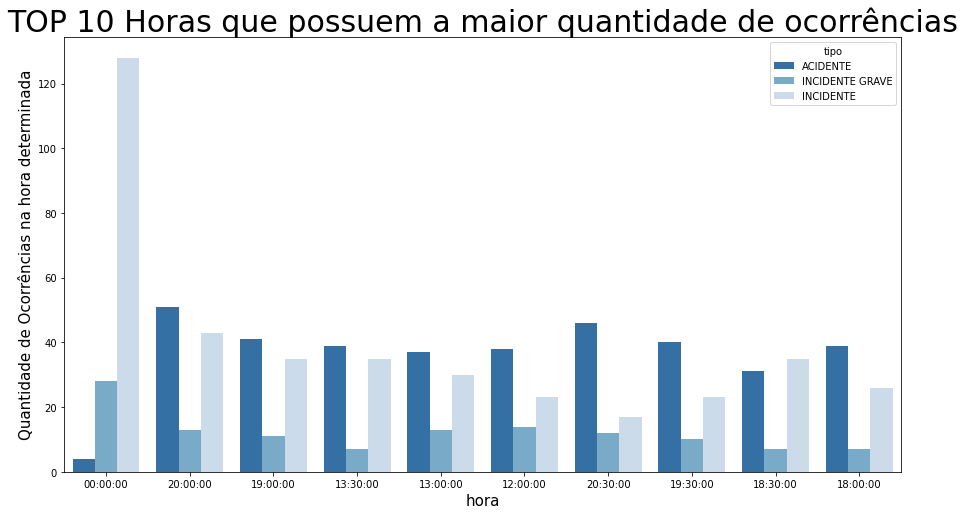

In [95]:
coluna_hora = df_CENIPA['hora']
incac_hora = coluna_hora.value_counts()

media_hora = incac_hora.mean()

moda_hora = sts.mode(coluna_hora)

desvio_hora = sts.stdev(incac_hora)

plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='hora', hue = 'tipo',order = df_CENIPA['hora'].value_counts().sort_values(ascending = False).index[0:10], palette = 'Blues_r')

plt.xlabel('hora', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de Ocorrências na hora determinada', fontdict={'fontsize': 15})

plt.title('TOP 10 Horas que possuem a maior quantidade de ocorrências', fontdict={'fontsize': 30})


print(incac_hora)
print('')
print('A média ocorrências  por hora é: {}'.format(media_hora))
print('')
print('A moda de ocorrências  por hora é: {}'.format(moda_hora))
print('')
print('O desvio padrão de ocorrências  por hora é: {}'.format(desvio_hora))
print('')
print('')
print('TOP 10 Ocorrências Dividas por hora e tipo')
df_CENIPA.groupby(['hora', 'tipo']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

SIM              2687
INDETERMINADO    2419
NÃO               136
Name: aeronave_liberada, dtype: int64

A média por tipo de liberação da aeronave de ocorrências é: 1747.3333333333333

A moda por tipo de liberação da aeronave de ocorrências é: SIM

O desvio padrão por tipo de liberação da aeronave de ocorrências é: 1401.874578317666


Tipos de Ocorrências Dividas por tipo de liberação da aeronave


quantidade
tipo            aeronave_liberada            
ACIDENTE        INDETERMINADO             551
                NÃO                       118
                SIM                      1025
INCIDENTE       INDETERMINADO            1690
                NÃO                         8
                SIM                      1189
INCIDENTE GRAVE INDETERMINADO             178
                NÃO                        10
                SIM                       473

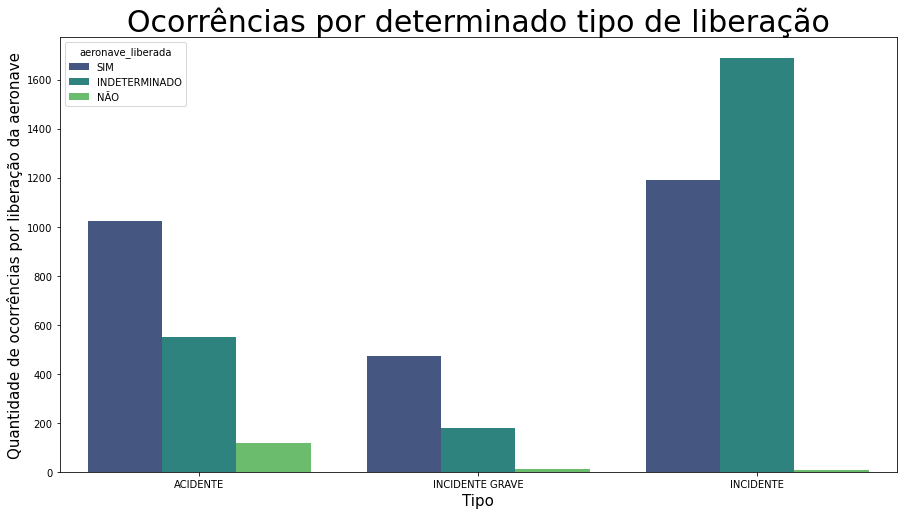

In [96]:
coluna_aeronave_liberada = df_CENIPA['aeronave_liberada']
incac_aeronave_liberada = coluna_aeronave_liberada.value_counts()

media_aeronave_liberada = incac_aeronave_liberada.mean()

moda_aeronave_liberada = sts.mode(coluna_aeronave_liberada)

desvio_aeronave_liberada = sts.stdev(incac_aeronave_liberada)

plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='tipo', hue = 'aeronave_liberada', palette = 'viridis' )

plt.xlabel('Tipo', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências por liberação da aeronave', fontdict={'fontsize': 15})

plt.title('Ocorrências por determinado tipo de liberação', fontdict={'fontsize': 30})


print(incac_aeronave_liberada)
print('')
print('A média por tipo de liberação da aeronave de ocorrências é: {}'.format(media_aeronave_liberada))
print('')
print('A moda por tipo de liberação da aeronave de ocorrências é: {}'.format(moda_aeronave_liberada))
print('')
print('O desvio padrão por tipo de liberação da aeronave de ocorrências é: {}'.format(desvio_aeronave_liberada))
print('')
print('')
print('Tipos de Ocorrências Dividas por tipo de liberação da aeronave')
df_CENIPA.groupby(['tipo', 'aeronave_liberada']).agg({'quantidade':'count'})

FINALIZADA       4066
ATIVA             816
INDETERMINADA     360
Name: status_investigacao, dtype: int64

A média por status da investigação é: 1747.3333333333333

A moda por status da investigação é: FINALIZADA

O desvio padrão por status da investigação é: 2020.9268500698718


Investigações por tipo de ocorrência


quantidade
tipo            status_investigacao            
ACIDENTE        ATIVA                       578
                FINALIZADA                  885
                INDETERMINADA               231
INCIDENTE       ATIVA                        41
                FINALIZADA                 2813
                INDETERMINADA                33
INCIDENTE GRAVE ATIVA                       197
                FINALIZADA                  368
                INDETERMINADA                96

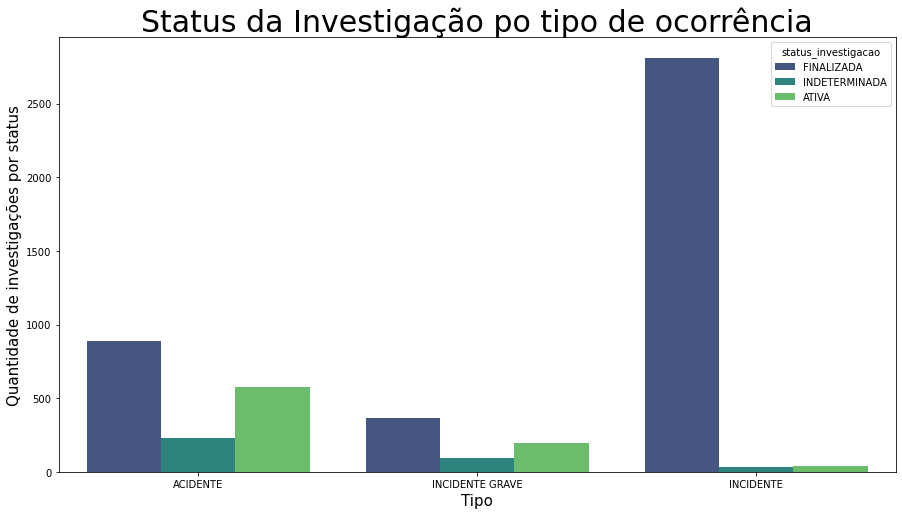

In [97]:
coluna_status_investigacao = df_CENIPA['status_investigacao']
incac_status_investigacao = coluna_status_investigacao.value_counts()

media_status_investigacao = incac_status_investigacao.mean()

moda_status_investigacao = sts.mode(coluna_status_investigacao)

desvio_status_investigacao = sts.stdev(incac_status_investigacao)

plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='tipo', hue = 'status_investigacao', palette = 'viridis' )

plt.xlabel('Tipo', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de investigações por status', fontdict={'fontsize': 15})

plt.title('Status da Investigação po tipo de ocorrência', fontdict={'fontsize': 30})


print(incac_status_investigacao)
print('')
print('A média por status da investigação é: {}'.format(media_status_investigacao))
print('')
print('A moda por status da investigação é: {}'.format(moda_status_investigacao))
print('')
print('O desvio padrão por status da investigação é: {}'.format(desvio_status_investigacao))
print('')
print('')
print('Investigações por tipo de ocorrência')
df_CENIPA.groupby(['tipo', 'status_investigacao']).agg({'quantidade':'count'})

1    5182
2      58
3       2
Name: aeronaves_envolvidas, dtype: int64

A moda por aeronaves envolvidas é: 1

O desvio padrão por aeronaves envolvidas é: 2974.640370420151


Investigações por tipo de ocorrência


quantidade
tipo            aeronaves_envolvidas            
ACIDENTE        1                           1682
                2                             12
INCIDENTE       1                           2855
                2                             31
                3                              1
INCIDENTE GRAVE 1                            645
                2                             15
                3                              1

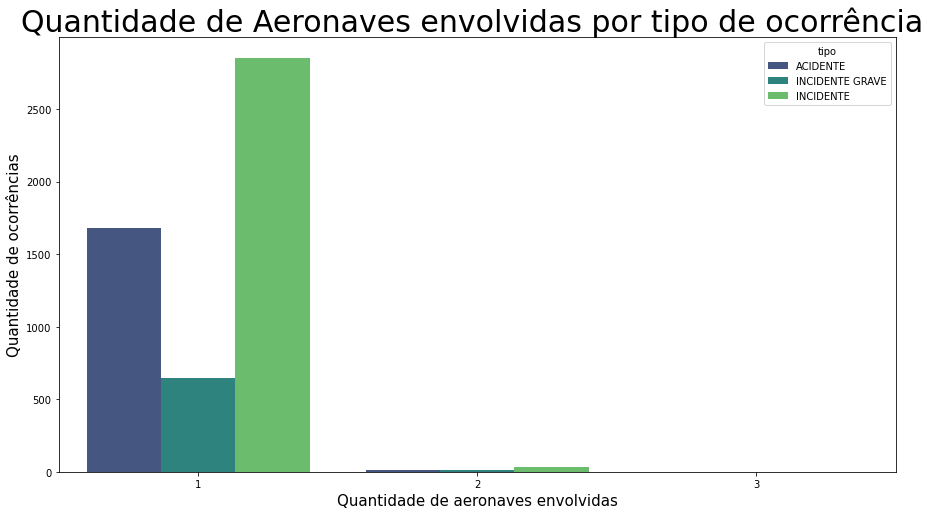

In [98]:
coluna_aeronaves_envolvidas = df_CENIPA['aeronaves_envolvidas']
incac_aeronaves_envolvidas = coluna_aeronaves_envolvidas.value_counts()

moda_aeronaves_envolvidas = sts.mode(coluna_aeronaves_envolvidas)

desvio_aeronaves_envolvidas = sts.stdev(incac_aeronaves_envolvidas)

plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='aeronaves_envolvidas', hue = 'tipo', palette = 'viridis' )

plt.xlabel('Quantidade de aeronaves envolvidas', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências', fontdict={'fontsize': 15})

plt.title('Quantidade de Aeronaves envolvidas por tipo de ocorrência ', fontdict={'fontsize': 30})


print(incac_aeronaves_envolvidas)
print('')
print('A moda por aeronaves envolvidas é: {}'.format(moda_aeronaves_envolvidas))
print('')
print('O desvio padrão por aeronaves envolvidas é: {}'.format(desvio_aeronaves_envolvidas))
print('')
print('')
print('Investigações por tipo de ocorrência')
df_CENIPA.groupby(['tipo', 'aeronaves_envolvidas']).agg({'quantidade':'count'})

NÃO    4784
SIM     458
Name: ocorrencia_saida_pista, dtype: int64

A moda por classificação de saida é: NÃO

O desvio padrão por classificação de saida é: 3058.9439354130045


Tipos de ocorrências por classificação de saida


quantidade
tipo            ocorrencia_saida_pista            
ACIDENTE        NÃO                           1448
                SIM                            246
INCIDENTE       NÃO                           2847
                SIM                             40
INCIDENTE GRAVE NÃO                            489
                SIM                            172

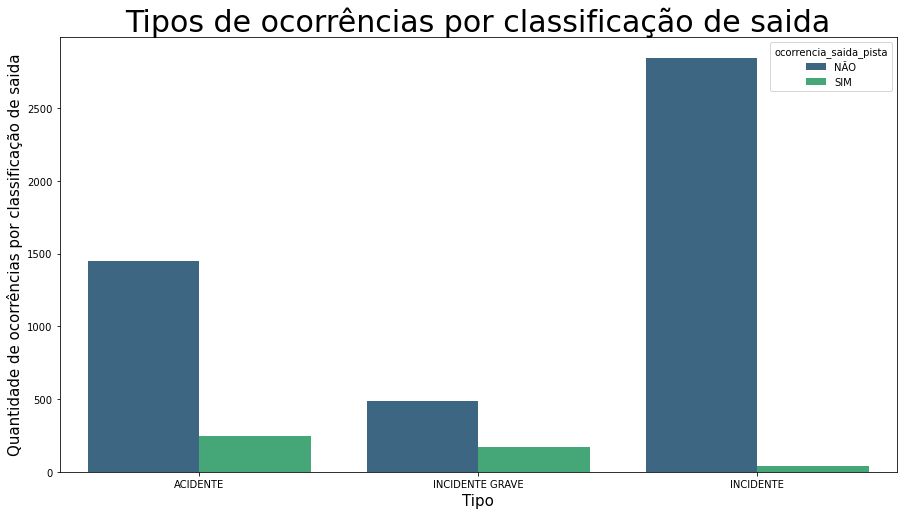

In [99]:
coluna_ocorrencia_saida_pista = df_CENIPA['ocorrencia_saida_pista']
incac_ocorrencia_saida_pista = coluna_ocorrencia_saida_pista.value_counts()


moda_ocorrencia_saida_pista = sts.mode(coluna_ocorrencia_saida_pista)

desvio_ocorrencia_saida_pista = sts.stdev(incac_ocorrencia_saida_pista)

plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='tipo', hue = 'ocorrencia_saida_pista', palette = 'viridis' )

plt.xlabel('Tipo', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências por classificação de saida', fontdict={'fontsize': 15})

plt.title('Tipos de ocorrências por classificação de saida', fontdict={'fontsize': 30})


print(incac_ocorrencia_saida_pista)
print('')
print('A moda por classificação de saida é: {}'.format(moda_ocorrencia_saida_pista))
print('')
print('O desvio padrão por classificação de saida é: {}'.format(desvio_ocorrencia_saida_pista))
print('')
print('')
print('Tipos de ocorrências por classificação de saida')
df_CENIPA.groupby(['tipo', 'ocorrencia_saida_pista']).agg({'quantidade':'count'})

AVIÃO            4213
HELICÓPTERO       600
ULTRALEVE         308
INDETERMINADO      86
PLANADOR           15
ANFÍBIO            12
TRIKE               5
DIRIGÍVEL           1
HIDROAVIÃO          1
BALÃO               1
Name: aeronave_tipo, dtype: int64

A média por tipo de aeronave é: 524.2

A moda por tipo de aeronave é: AVIÃO

O desvio padrão por tipo de aeronave é: 1310.8169462845171


Ocorências por tipo de aeronave


quantidade
tipo            aeronave_tipo            
ACIDENTE        ANFÍBIO                 7
                AVIÃO                1212
                BALÃO                   1
                DIRIGÍVEL               1
                HELICÓPTERO           206
                INDETERMINADO          34
                PLANADOR               10
                TRIKE                   5
                ULTRALEVE             218
INCIDENTE       ANFÍBIO                 4
                AVIÃO                2441
                HELICÓPTERO           343
                HIDROAVIÃO              1
                INDETERMINADO          43
                PLANADOR                2
                ULTRALEVE              53
INCIDENTE GRAVE ANFÍBIO                 1
                AVIÃO                 560
                HELICÓPTERO            51
                INDETERMINADO           9
                PLANADOR                3
                ULTRALEVE              37

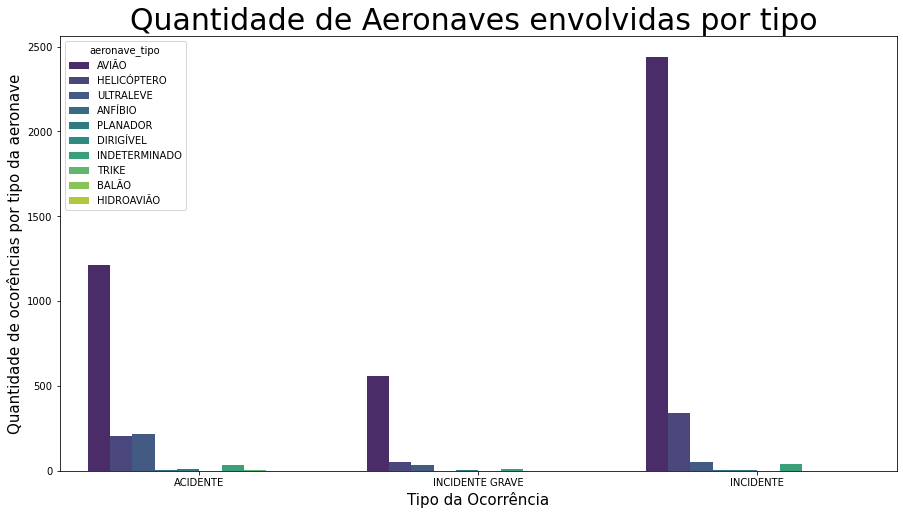

In [100]:
coluna_aeronave_tipo = df_CENIPA['aeronave_tipo']
incac_aeronave_tipo = coluna_aeronave_tipo.value_counts()

media_aeronave_tipo = incac_aeronave_tipo.mean()

moda_aeronave_tipo = sts.mode(coluna_aeronave_tipo)

desvio_aeronave_tipo = sts.stdev(incac_aeronave_tipo)

plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='tipo', hue = 'aeronave_tipo', palette = 'viridis' )

plt.xlabel('Tipo da Ocorrência', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorências por tipo da aeronave', fontdict={'fontsize': 15})

plt.title('Quantidade de Aeronaves envolvidas por tipo ', fontdict={'fontsize': 30})



print(incac_aeronave_tipo)
print('')
print('A média por tipo de aeronave é: {}'.format(media_aeronave_tipo))
print('')
print('A moda por tipo de aeronave é: {}'.format(moda_aeronave_tipo))
print('')
print('O desvio padrão por tipo de aeronave é: {}'.format(desvio_aeronave_tipo))
print('')
print('')
print('Ocorências por tipo de aeronave')
df_CENIPA.groupby(['tipo', 'aeronave_tipo']).agg({'quantidade':'count'})

PISTÃO           2952
JATO             1017
TURBOÉLICE        625
TURBOEIXO         501
INDETERMINADO     132
SEM TRAÇÃO         15
Name: motor_tipo, dtype: int64

A média por tipo de motor é: 873.6666666666666

A moda por tipo de motor é: PISTÃO

O desvio padrão por tipo de motor é: 1079.6395077370348


Ocorências por tipo de moto


quantidade
tipo            aeronave_tipo motor_tipo               
ACIDENTE        ANFÍBIO       PISTÃO                  3
                              TURBOÉLICE              4
                AVIÃO         INDETERMINADO          10
                              JATO                   27
                              PISTÃO               1072
                              TURBOÉLICE            103
                BALÃO         SEM TRAÇÃO              1
                DIRIGÍVEL     PISTÃO                  1
                HELICÓPTERO   PISTÃO                103
                              TURBOEIXO             103
                INDETERMINADO INDETERMINADO          34
                PLANADOR      INDETERMINADO           1
                              SEM TRAÇÃO              9
                TRIKE         INDETERMINADO           4
                              PISTÃO                  1
                ULTRALEVE     INDETERMINADO          11
                              PISTÃO                207
INCIDENTE       ANFÍBIO       PISTÃO                  2
                              TURBOÉLICE              2
                AVIÃO         INDETERMINADO          14
                              JATO                  927
                              PISTÃO               1013
                              TURBOEIXO              39
                              TURBOÉLICE            448
                HELICÓPTERO   PISTÃO                 27
                              TURBOEIXO             315
                              TURBOÉLICE              1
                HIDROAVIÃO    PISTÃO                  1
                INDETERMINADO INDETERMINADO          43
                PLANADOR      SEM TRAÇÃO              2
                ULTRALEVE     PISTÃO                 53
INCIDENTE GRAVE ANFÍBIO       PISTÃO                  1
                AVIÃO         INDETERMINADO           1
                              JATO                   63
                              PISTÃO                428
                              TURBOEIXO               1
                              TURBOÉLICE             67
                HELICÓPTERO   PISTÃO                  8
                              TURBOEIXO              43
                INDETERMINADO INDETERMINADO           9
                PLANADOR      SEM TRAÇÃO              3
                ULTRALEVE     INDETERMINADO           5
                              PISTÃO                 32

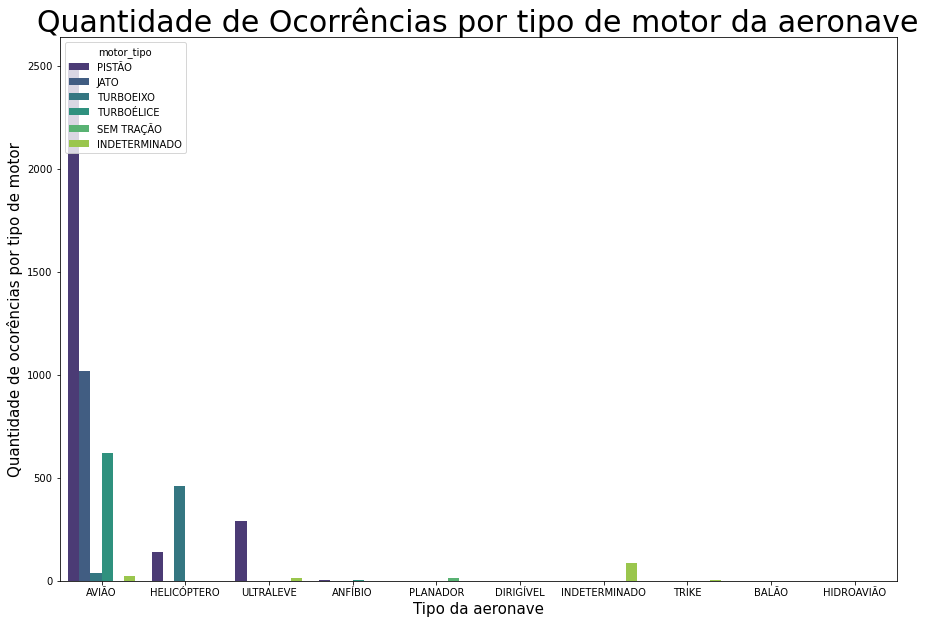

In [101]:
coluna_motor_tipo = df_CENIPA['motor_tipo']
incac_motor_tipo = coluna_motor_tipo.value_counts()

media_motor_tipo = incac_motor_tipo.mean()

moda_motor_tipo = sts.mode(coluna_motor_tipo)

desvio_motor_tipo = sts.stdev(incac_motor_tipo)

plt.figure(figsize = (15,10))
sns.countplot(data = df_CENIPA, x ='aeronave_tipo', hue = 'motor_tipo', palette = 'viridis' )

plt.xlabel('Tipo da aeronave', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorências por tipo de motor', fontdict={'fontsize': 15})

plt.title('Quantidade de Ocorrências por tipo de motor da aeronave', fontdict={'fontsize': 30})

print(incac_motor_tipo)
print('')
print('A média por tipo de motor é: {}'.format(media_motor_tipo))
print('')
print('A moda por tipo de motor é: {}'.format(moda_motor_tipo))
print('')
print('O desvio padrão por tipo de motor é: {}'.format(desvio_motor_tipo))
print('')
print('')
print('Ocorências por tipo de moto')
df_CENIPA.groupby(['tipo', 'aeronave_tipo', 'motor_tipo']).agg({'quantidade':'count'})

CESSNA AIRCRAFT                        800
EMBRAER                                589
NEIVA INDUSTRIA AERONAUTICA            583
PIPER AIRCRAFT                         373
INDETERMINADO                          286
                                      ... 
EADS AIRBUS                              1
JOÃO ISMAEL VICENTINI                    1
LAKE AIRCRAFT                            1
TEXTRON AVIATION INC                     1
SAFARI HELICOPTER CO. INTERNATIONAL      1
Name: aeronave_fabricante, Length: 223, dtype: int64

A média por fabricante da aeronave é: 23.506726457399104

A moda por fabricante da aeronave é: CESSNA AIRCRAFT

O desvio padrão por fabricante da aeronave é: 90.47028629499695


Top 10 Ocorências por fabricante da aeronave


,quantidade
aeronave_fabricante,
CESSNA AIRCRAFT,800
EMBRAER,589
NEIVA INDUSTRIA AERONAUTICA,583
PIPER AIRCRAFT,373
INDETERMINADO,286
AIRBUS INDUSTRIE,273
BOEING COMPANY,272
BEECH AIRCRAFT,267
AEROSPATIALE AND ALENIA,243


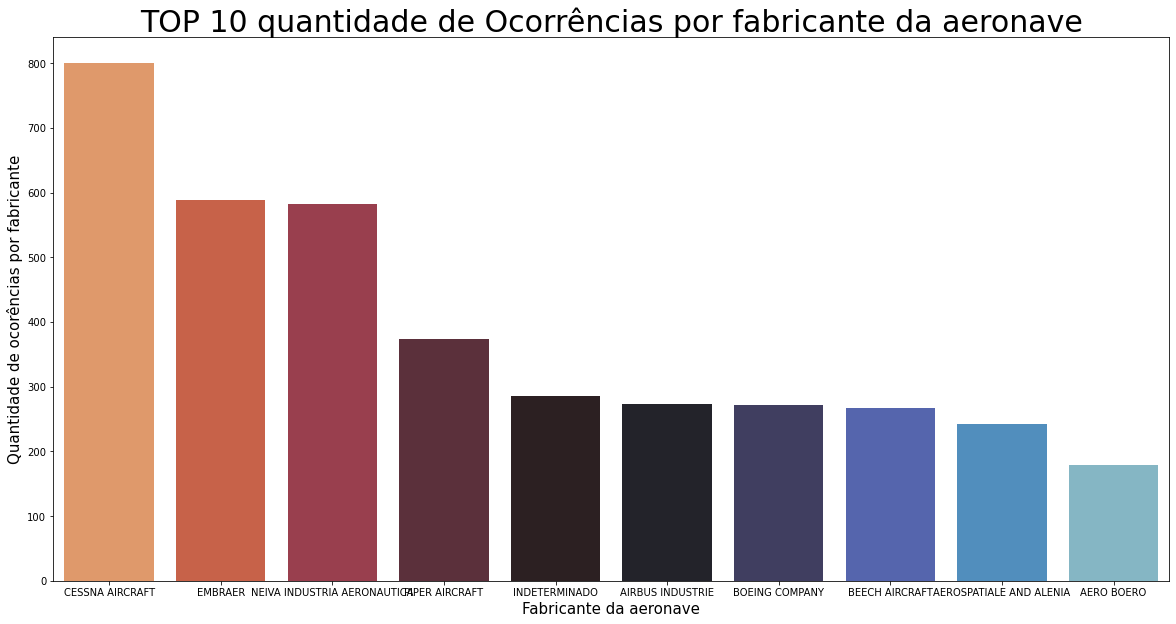

In [102]:
coluna_aeronave_fabricante = df_CENIPA['aeronave_fabricante']
incac_aeronave_fabricante = coluna_aeronave_fabricante.value_counts()

media_aeronave_fabricante = incac_aeronave_fabricante.mean()

moda_aeronave_fabricante = sts.mode(coluna_aeronave_fabricante)

desvio_aeronave_fabricante = sts.stdev(incac_aeronave_fabricante)

plt.figure(figsize = (20,10))
sns.countplot(data = df_CENIPA, x ='aeronave_fabricante', order = df_CENIPA['aeronave_fabricante'].value_counts().sort_values(ascending = False).index[0:10], palette='icefire_r' )

plt.xlabel('Fabricante da aeronave', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorências por fabricante', fontdict={'fontsize': 15})

plt.title('TOP 10 quantidade de Ocorrências por fabricante da aeronave', fontdict={'fontsize': 30})

print(incac_aeronave_fabricante)
print('')
print('A média por fabricante da aeronave é: {}'.format(media_aeronave_fabricante))
print('')
print('A moda por fabricante da aeronave é: {}'.format(moda_aeronave_fabricante))
print('')
print('O desvio padrão por fabricante da aeronave é: {}'.format(desvio_aeronave_fabricante))
print('')
print('')
print('Top 10 Ocorências por fabricante da aeronave')
df_CENIPA.groupby(['aeronave_fabricante']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

MONOMOTOR        2648
BIMOTOR          2365
SEM TRAÇÃO        100
TRIMOTOR           69
INDETERMINADO      54
QUADRIMOTOR         6
Name: aeronave_motor_quantidade, dtype: int64

A moda por quantidade de motores da aeronave é: MONOMOTOR

O desvio padrão por quantidade de motores da aeronave é: 1268.3123695157542


Ocorências por tipo de aeronave e quantidade de motores


quantidade
aeronave_tipo aeronave_motor_quantidade            
ANFÍBIO       MONOMOTOR                          12
AVIÃO         BIMOTOR                          2104
              INDETERMINADO                      12
              MONOMOTOR                        2004
              QUADRIMOTOR                         6
              SEM TRAÇÃO                         18
              TRIMOTOR                           69
BALÃO         SEM TRAÇÃO                          1
DIRIGÍVEL     MONOMOTOR                           1
HELICÓPTERO   BIMOTOR                           261
              INDETERMINADO                       1
              MONOMOTOR                         338
HIDROAVIÃO    MONOMOTOR                           1
INDETERMINADO INDETERMINADO                      33
              SEM TRAÇÃO                         53
PLANADOR      SEM TRAÇÃO                         15
TRIKE         INDETERMINADO                       2
              MONOMOTOR                           1
              SEM TRAÇÃO                          2
ULTRALEVE     INDETERMINADO                       6
              MONOMOTOR                         291
              SEM TRAÇÃO                         11

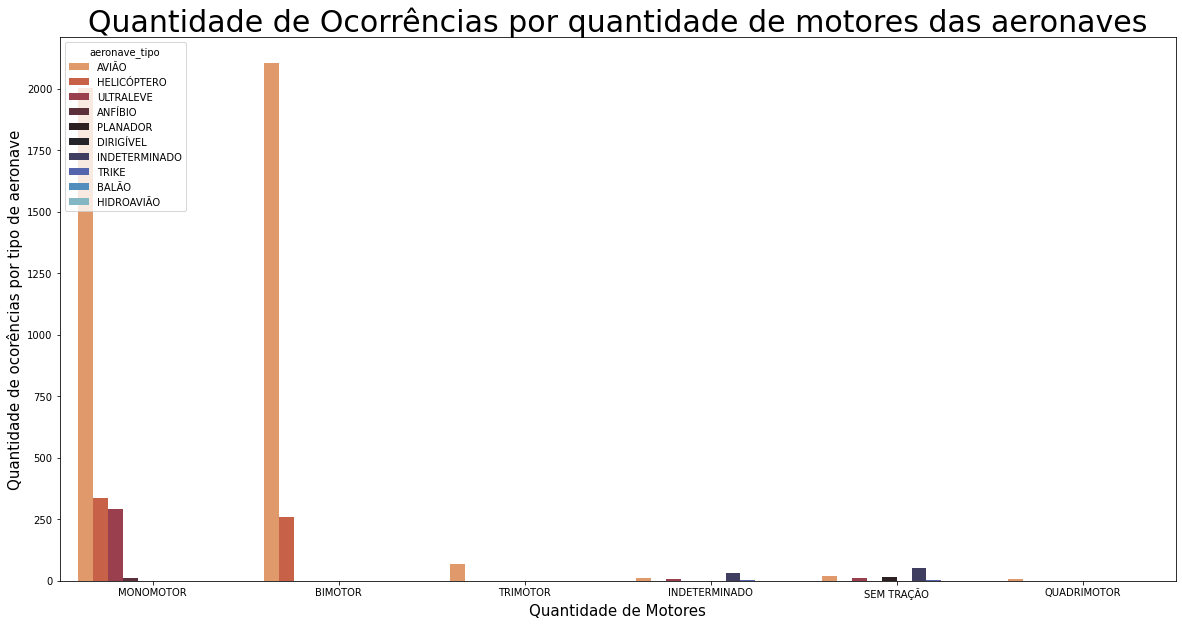

In [103]:
coluna_aeronave_motor_quantidade = df_CENIPA['aeronave_motor_quantidade']
incac_aeronave_motor_quantidade = coluna_aeronave_motor_quantidade.value_counts()


moda_aeronave_motor_quantidade = sts.mode(coluna_aeronave_motor_quantidade)

desvio_aeronave_motor_quantidade = sts.stdev(incac_aeronave_motor_quantidade)

plt.figure(figsize = (20,10))
sns.countplot(data = df_CENIPA, x ='aeronave_motor_quantidade', hue = df_CENIPA['aeronave_tipo'], palette='icefire_r' )

plt.xlabel('Quantidade de Motores', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorências por tipo de aeronave', fontdict={'fontsize': 15})

plt.title('Quantidade de Ocorrências por quantidade de motores das aeronaves', fontdict={'fontsize': 30})

print(incac_aeronave_motor_quantidade)
print('')
print('A moda por quantidade de motores da aeronave é: {}'.format(moda_aeronave_motor_quantidade))
print('')
print('O desvio padrão por quantidade de motores da aeronave é: {}'.format(desvio_aeronave_motor_quantidade))
print('')
print('')
print('Ocorências por tipo de aeronave e quantidade de motores')
df_CENIPA.groupby(['aeronave_tipo','aeronave_motor_quantidade']).agg({'quantidade':'count'})

MONOMOTOR        2648
BIMOTOR          2365
SEM TRAÇÃO        100
TRIMOTOR           69
INDETERMINADO      54
QUADRIMOTOR         6
Name: aeronave_motor_quantidade, dtype: int64

A média por fabricante da aeronave é: 873.6666666666666

A moda por quantidade de assentos da aeronave é: 6

O desvio padrão por quantidade de assentos da aeronave é: 1268.3123695157542


TOP 10 Ocorências por quantidade de assentos e tipo de aeronave


,,quantidade
aeronave_assentos,aeronave_tipo,
6,AVIÃO,754
4,AVIÃO,544
2,AVIÃO,476
1,AVIÃO,463
2,ULTRALEVE,252
7,AVIÃO,251
0,AVIÃO,181
10,AVIÃO,143
125,AVIÃO,133


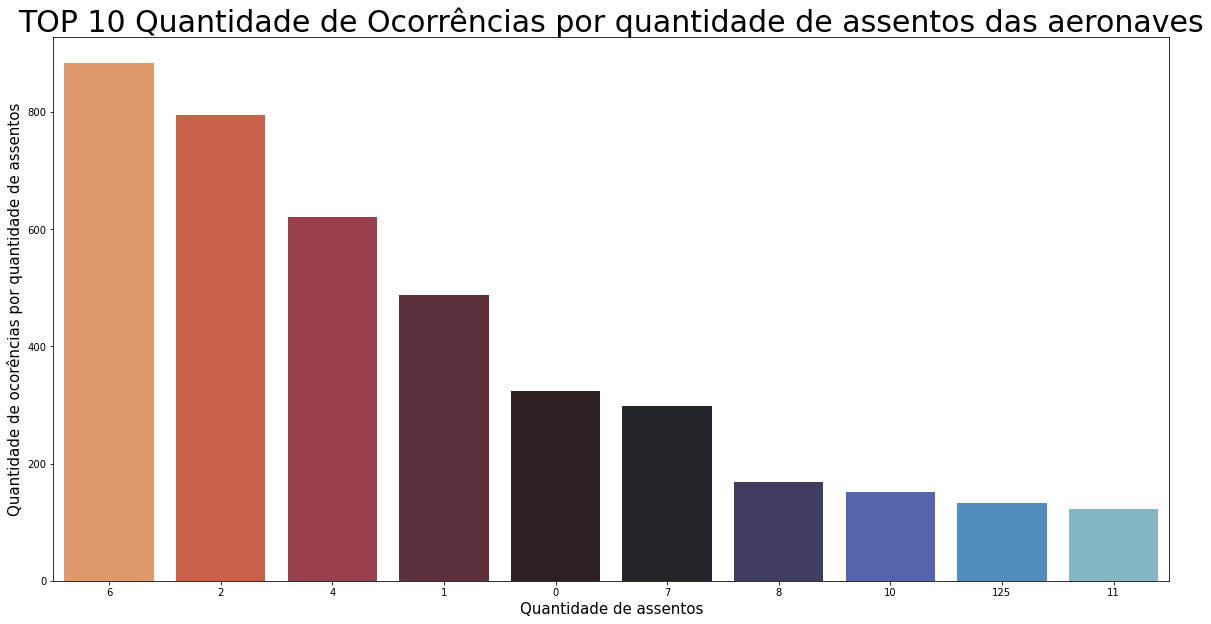

In [104]:
coluna_aeronave_assentos = df_CENIPA['aeronave_assentos']
incac_aeronave_assentos = coluna_aeronave_motor_quantidade.value_counts()

media_aeronave_assentos = incac_aeronave_assentos.mean()

moda_aeronave_assentos = sts.mode(coluna_aeronave_assentos)

desvio_aeronave_assentos= sts.stdev(incac_aeronave_assentos)

plt.figure(figsize = (20,10))
sns.countplot(data = df_CENIPA, x ='aeronave_assentos',order = df_CENIPA['aeronave_assentos'].value_counts().sort_values(ascending = False).index[0:10], palette='icefire_r' )

plt.xlabel('Quantidade de assentos', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorências por quantidade de assentos', fontdict={'fontsize': 15})

plt.title('TOP 10 Quantidade de Ocorrências por quantidade de assentos das aeronaves', fontdict={'fontsize': 30})

print(incac_aeronave_assentos)
print('')
print('A média por fabricante da aeronave é: {}'.format(media_aeronave_assentos))
print('')
print('A moda por quantidade de assentos da aeronave é: {}'.format(moda_aeronave_assentos))
print('')
print('O desvio padrão por quantidade de assentos da aeronave é: {}'.format(desvio_aeronave_assentos))
print('')
print('')
print('TOP 10 Ocorências por quantidade de assentos e tipo de aeronave')
df_CENIPA.groupby(['aeronave_assentos','aeronave_tipo']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

0       345
2008    229
2010    220
2009    216
2011    197
       ... 
1954      1
1945      1
1956      1
1940      1
1942      1
Name: aeronave_ano_fabricacao, Length: 79, dtype: int64

A moda por ano de fabricação da aeronave é: 6

O desvio padrão por ano de fabricação da aeronave é: 68.99814898570413


Ocorências por ano de fabricação e tipo


,,quantidade
aeronave_ano_fabricacao,tipo,
0,INCIDENTE,182
2008,INCIDENTE,160
2010,INCIDENTE,152
2009,INCIDENTE,151
2012,INCIDENTE,135
0,ACIDENTE,133
2011,INCIDENTE,127
2007,INCIDENTE,109
1980,INCIDENTE,100


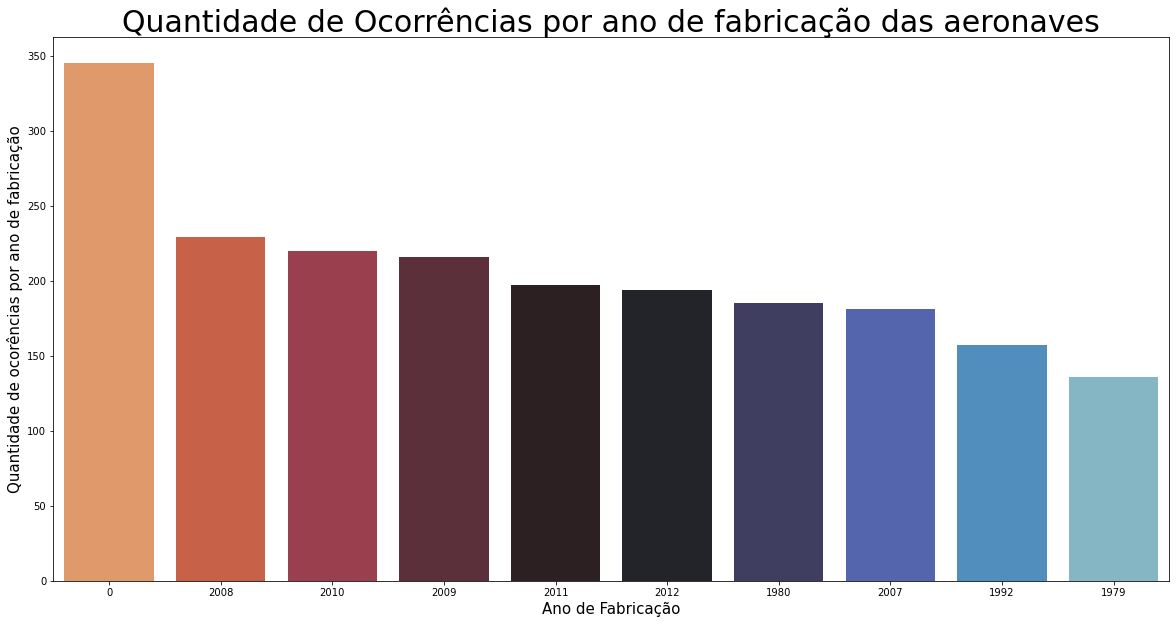

In [105]:
coluna_aeronave_ano_fabricacao = df_CENIPA['aeronave_ano_fabricacao']
incac_aeronave_ano_fabricacao = coluna_aeronave_ano_fabricacao.value_counts()

moda_aeronave_ano_fabricacao = sts.mode(coluna_aeronave_ano_fabricacao)

desvio_aeronave_ano_fabricacao = sts.stdev(incac_aeronave_ano_fabricacao)

plt.figure(figsize = (20,10))
sns.countplot(data = df_CENIPA, x ='aeronave_ano_fabricacao',order = df_CENIPA['aeronave_ano_fabricacao'].value_counts().sort_values(ascending = False).index[0:10], palette='icefire_r' )

plt.xlabel('Ano de Fabricação', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorências por ano de fabricação', fontdict={'fontsize': 15})

plt.title('Quantidade de Ocorrências por ano de fabricação das aeronaves', fontdict={'fontsize': 30})

print(incac_aeronave_ano_fabricacao)
print('')
print('A moda por ano de fabricação da aeronave é: {}'.format(moda_aeronave_assentos))
print('')
print('O desvio padrão por ano de fabricação da aeronave é: {}'.format(desvio_aeronave_ano_fabricacao))
print('')
print('')
print('Ocorências por ano de fabricação e tipo')
df_CENIPA.groupby(['aeronave_ano_fabricacao','tipo']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

BRASIL              5139
ESTADOS UNIDOS        49
NÃO IDENTIFICADO      11
PARAGUAI               8
CHILE                  5
PORTUGAL               5
BOLÍVIA                4
ESPANHA                3
ALEMANHA               3
ARGENTINA              2
PANAMÁ                 2
FRANÇA                 2
COLÔMBIA               2
URUGUAI                1
CINGAPURA              1
POLÔNIA                1
ÁFRICA DO SUL          1
VENEZUELA              1
ITÁLIA                 1
SUIÇA                  1
Name: aeronave_pais_fabricante, dtype: int64

A moda por país fabricante da aeronave é: BRASIL

O desvio padrão por país fabricante da aeronave é: 1147.952085007769


TOP 10 Ocorências por país fabricante e tipo de aeronave


quantidade
aeronave_pais_fabricante tipo                       
ALEMANHA                 INCIDENTE                 3
ARGENTINA                INCIDENTE                 2
BOLÍVIA                  ACIDENTE                  2
                         INCIDENTE                 2
BRASIL                   ACIDENTE               1670
                         INCIDENTE              2813
                         INCIDENTE GRAVE         656
CHILE                    INCIDENTE                 5
CINGAPURA                INCIDENTE                 1
COLÔMBIA                 INCIDENTE                 2
ESPANHA                  ACIDENTE                  1
                         INCIDENTE                 2
ESTADOS UNIDOS           ACIDENTE                 11
                         INCIDENTE                37
                         INCIDENTE GRAVE           1
FRANÇA                   INCIDENTE                 2
ITÁLIA                   INCIDENTE                 1
NÃO IDENTIFICADO         ACIDENTE                  1
                         INCIDENTE                 8
                         INCIDENTE GRAVE           2
PANAMÁ                   INCIDENTE                 2
PARAGUAI                 ACIDENTE                  7
                         INCIDENTE                 1
POLÔNIA                  ACIDENTE                  1
PORTUGAL                 INCIDENTE                 4
                         INCIDENTE GRAVE           1
SUIÇA                    INCIDENTE                 1
URUGUAI                  ACIDENTE                  1
VENEZUELA                INCIDENTE                 1
ÁFRICA DO SUL            INCIDENTE GRAVE           1

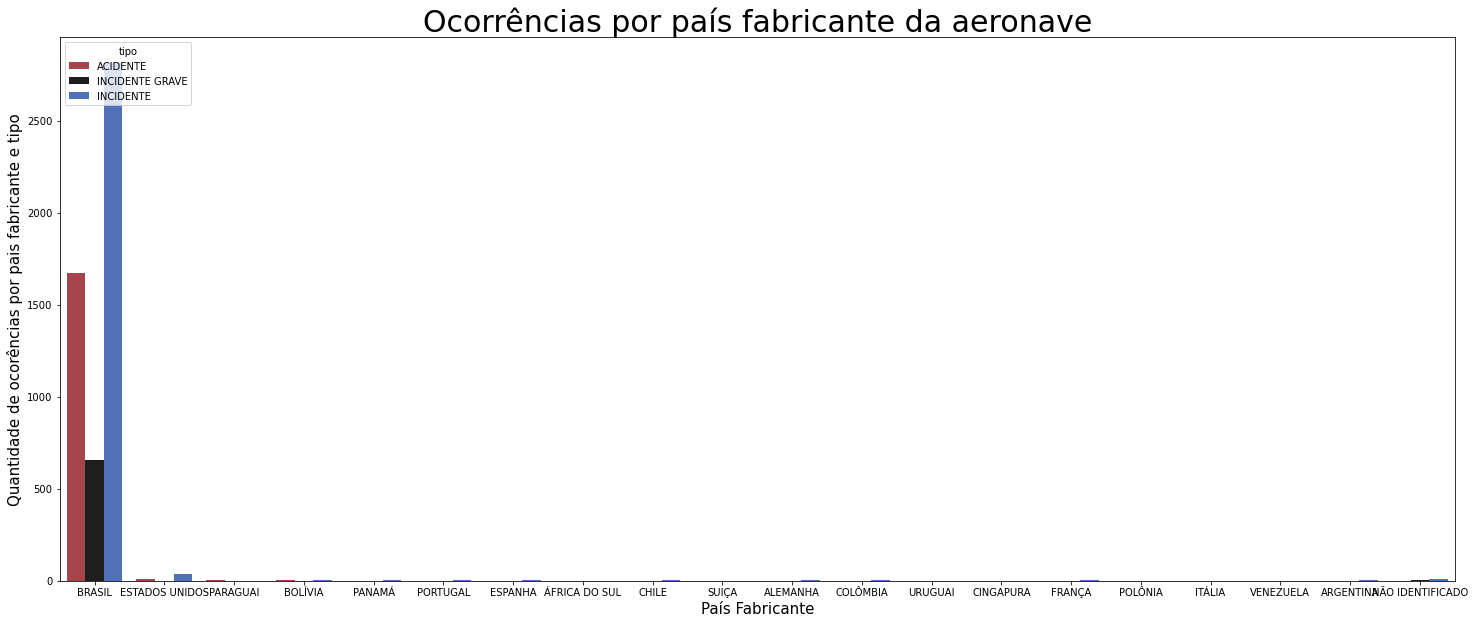

In [106]:
coluna_aeronave_pais_fabricante = df_CENIPA['aeronave_pais_fabricante']
incac_aeronave_pais_fabricante = coluna_aeronave_pais_fabricante.value_counts()

moda_aeronave_pais_fabricante = sts.mode(coluna_aeronave_pais_fabricante)

desvio_aeronave_pais_fabricante= sts.stdev(incac_aeronave_pais_fabricante)

plt.figure(figsize = (25,10))
sns.countplot(data = df_CENIPA, x ='aeronave_pais_fabricante', hue = 'tipo', palette='icefire_r' )

plt.xlabel('País Fabricante', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorências por pais fabricante e tipo', fontdict={'fontsize': 15})

plt.title('Ocorrências por país fabricante da aeronave', fontdict={'fontsize': 30})

print(incac_aeronave_pais_fabricante)
print('')
print('A moda por país fabricante da aeronave é: {}'.format(moda_aeronave_pais_fabricante))
print('')
print('O desvio padrão por país fabricante da aeronave é: {}'.format(desvio_aeronave_pais_fabricante))
print('')
print('')
print('TOP 10 Ocorências por país fabricante e tipo de aeronave')
df_CENIPA.groupby(['aeronave_pais_fabricante','tipo']).agg({'quantidade':'count'})

POUSO                              910
DECOLAGEM                          852
CRUZEIRO                           744
CORRIDA APÓS POUSO                 560
TÁXI                               402
SUBIDA                             341
APROXIMAÇÃO FINAL                  266
MANOBRA                            194
ESPECIALIZADA                      160
DESCIDA                            155
CIRCUITO DE TRÁFEGO                131
INDETERMINADA                       97
OUTRA FASE                          85
ESTACIONAMENTO                      68
VOO A BAIXA ALTURA                  49
ARREMETIDA NO SOLO                  42
OPERAÇÃO DE SOLO                    31
PARTIDA DO MOTOR                    28
ARREMETIDA NO AR                    26
PAIRADO                             18
RETA FINAL                          15
DECOLAGEM VERTICAL                  12
PROCEDIMENTO DE APROXIMAÇÃO IFR     11
INDETERMINADO                       11
CHEQUE DE MOTOR OU ROTOR             8
SAÍDA IFR                

quantidade
tipo            aeronave_fase_operacao            
INCIDENTE       POUSO                          436
                DECOLAGEM                      434
                CRUZEIRO                       426
                TÁXI                           354
ACIDENTE        DECOLAGEM                      331
INCIDENTE       CORRIDA APÓS POUSO             306
ACIDENTE        POUSO                          279
INCIDENTE       SUBIDA                         251
ACIDENTE        CRUZEIRO                       238
INCIDENTE GRAVE POUSO                          195

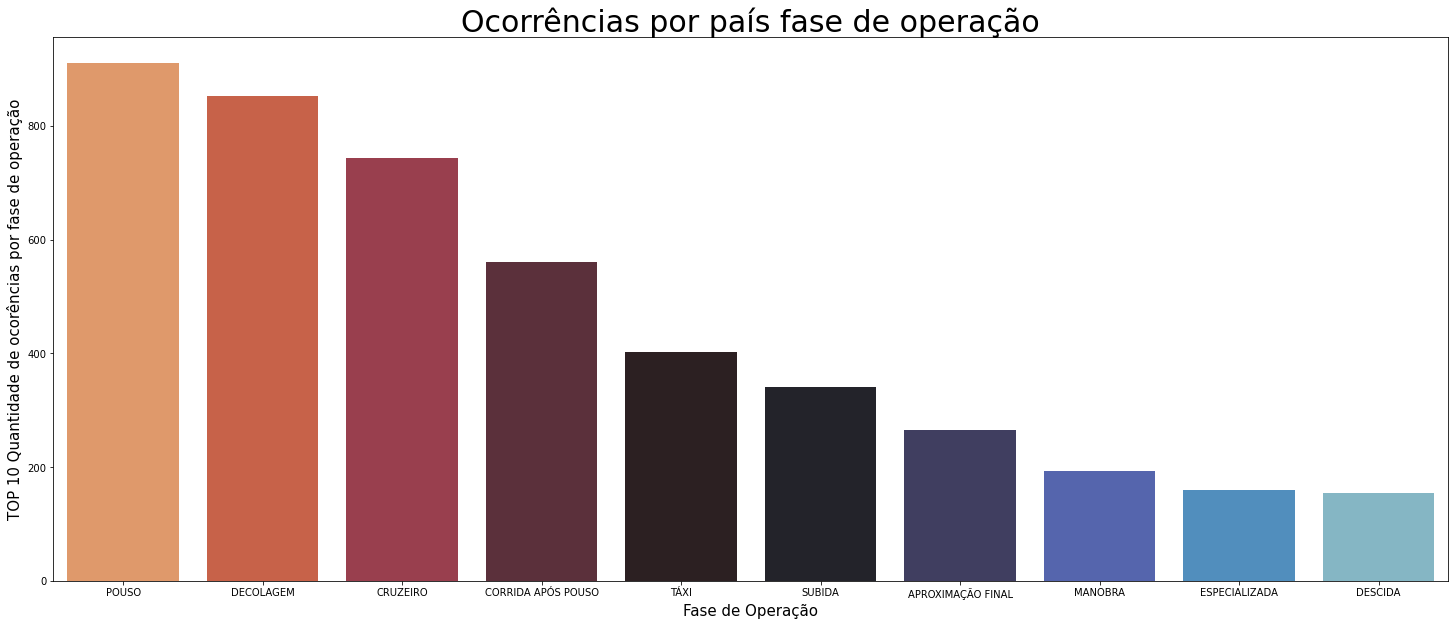

In [107]:
coluna_aeronave_fase_operacao = df_CENIPA['aeronave_fase_operacao']
incac_aeronave_fase_operacao = coluna_aeronave_fase_operacao.value_counts()

media_aeronave_fase_operacao = incac_aeronave_fase_operacao.mean()

moda_aeronave_fase_operacao = sts.mode(coluna_aeronave_fase_operacao)

desvio_aeronave_fase_operacao= sts.stdev(incac_aeronave_fase_operacao)

plt.figure(figsize = (25,10))
sns.countplot(data = df_CENIPA, x ='aeronave_fase_operacao', order = df_CENIPA['aeronave_fase_operacao'].value_counts().sort_values(ascending = False).index[0:10], palette='icefire_r' )

plt.xlabel('Fase de Operação', fontdict={'fontsize': 15})
plt.ylabel('TOP 10 Quantidade de ocorências por fase de operação', fontdict={'fontsize': 15})

plt.title('Ocorrências por país fase de operação', fontdict={'fontsize': 30})

print(incac_aeronave_fase_operacao)
print('')
print('A média por fase de operação é: {}'.format(media_aeronave_fase_operacao))
print('')
print('A moda por país fase de operação é: {}'.format(moda_aeronave_fase_operacao))
print('')
print('O desvio padrão por país fase de operação é: {}'.format(desvio_aeronave_fase_operacao))
print('')
print('')
print('TOP 10 Ocorências por fas de operação')
df_CENIPA.groupby(['tipo','aeronave_fase_operacao']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

NENHUM           1827
LEVE             1529
SUBSTANCIAL      1515
DESTRUÍDA         329
INDETERMINADO      42
Name: aeronave_nivel_dano, dtype: int64

A média de ocorrências por nível de dano da aeronave é: 1048.4

A moda por nível de dano da aeronave é: NENHUM

O desvio padrão por nível de dano da aeronave é: 803.9414157760501


Ocorências por nível de dano e tipo de aeronave


quantidade
aeronave_nivel_dano tipo                       
DESTRUÍDA           ACIDENTE                329
INDETERMINADO       ACIDENTE                 24
                    INCIDENTE                12
                    INCIDENTE GRAVE           6
LEVE                ACIDENTE                 55
                    INCIDENTE              1174
                    INCIDENTE GRAVE         300
NENHUM              ACIDENTE                 25
                    INCIDENTE              1640
                    INCIDENTE GRAVE         162
SUBSTANCIAL         ACIDENTE               1261
                    INCIDENTE                61
                    INCIDENTE GRAVE         193

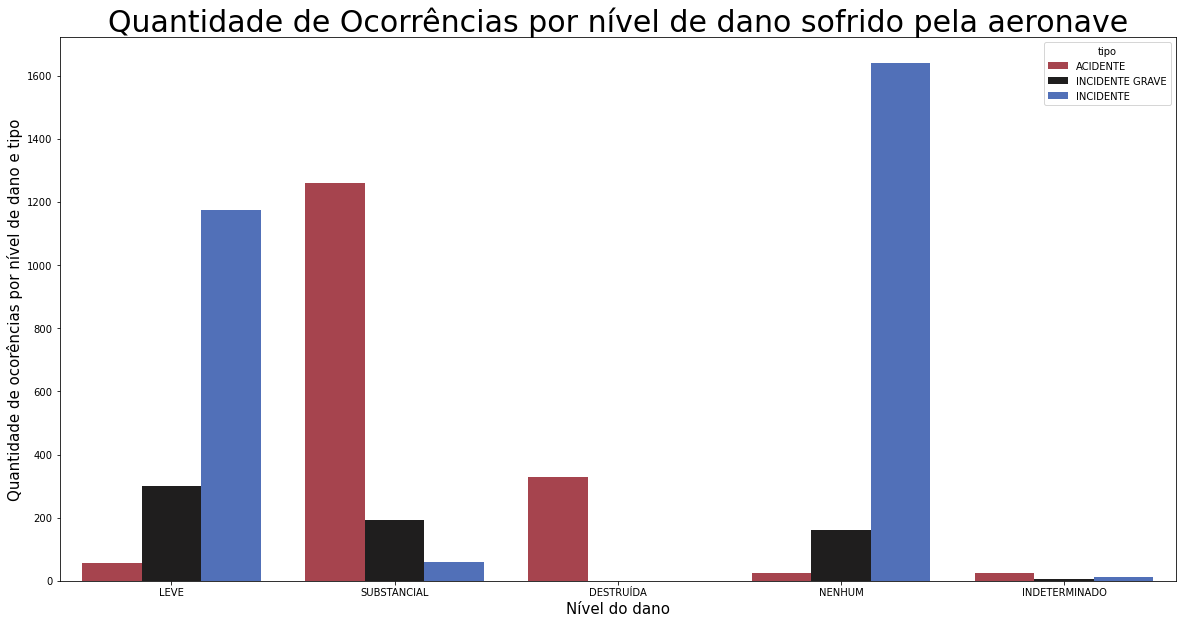

In [108]:
coluna_aeronave_nivel_dano = df_CENIPA['aeronave_nivel_dano']
incac_aeronave_nivel_dano = coluna_aeronave_nivel_dano.value_counts()

media_aeronave_nivel_dano = incac_aeronave_nivel_dano.mean()

moda_aeronave_nivel_dano = sts.mode(coluna_aeronave_nivel_dano)

desvio_aeronave_nivel_dano= sts.stdev(incac_aeronave_nivel_dano)

plt.figure(figsize = (20,10))
sns.countplot(data = df_CENIPA, x ='aeronave_nivel_dano',hue = 'tipo', palette='icefire_r' )

plt.xlabel('Nível do dano', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorências por nível de dano e tipo', fontdict={'fontsize': 15})

plt.title('Quantidade de Ocorrências por nível de dano sofrido pela aeronave', fontdict={'fontsize': 30})

print(incac_aeronave_nivel_dano)
print('')
print('A média de ocorrências por nível de dano da aeronave é: {}'.format(media_aeronave_nivel_dano))
print('')
print('A moda por nível de dano da aeronave é: {}'.format(moda_aeronave_nivel_dano))
print('')
print('O desvio padrão por nível de dano da aeronave é: {}'.format(desvio_aeronave_nivel_dano))
print('')
print('')
print('Ocorências por nível de dano e tipo de aeronave')
df_CENIPA.groupby(['aeronave_nivel_dano','tipo']).agg({'quantidade':'count'})

In [109]:
df_CENIPA = df_CENIPA.drop(columns=['quantidade']) # Removendo a coluna
df_CENIPA.head()

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,12/01/2010,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,08/04/2010,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,19/03/2010,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,21/03/2010,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,10/03/2010,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


# Bibliotecas utilizadas
**PANDAS**: O pandas é uma ferramenta de análise e manipulação de dados de código aberto rápida, poderosa, flexível e fácil de usar,
construída sobre a linguagem de programação Python.

MOTIVO DA UTILIZAÇÃO:

* Um objeto DataFrame rápido e eficiente para manipulação de dados com indexação integrada;

* Ferramentas para ler e gravar dados entre estruturas de dados na memória e diferentes formatos: arquivos CSV e de texto, Microsoft Excel, bancos de dados SQL e o formato rápido HDF5;

* Alinhamento inteligente de dados e manuseio integrado de dados perdidos;

* Remodelagem e rotação flexível de conjuntos de dados;

* Mesclagem e junção de conjuntos de dados de alto desempenho.

LINK:https://pandas.pydata.org/about/index.html



**SEABORN**: Seaborn é uma biblioteca de visualização de dados construída em cima do matplotlib e intimamente integrada com as estruturas de dados do pandas em Python. A visualização é a parte central do Seaborn que ajuda na exploração e compreensão dos dados.

MOTIVO DA UTILIZAÇÃO:

* API orientada a conjuntos de dados para determinar a relação entre as variáveis.

* Estimativa automática e plotagem de gráficos de regressão linear.

* Ele suporta abstrações de alto nível para grades multi-plot.

* Visualizando distribuição univariada e bivariada

LINK:https://towardsdatascience.com/seaborn-python-8563c3d0ad41




**PYPLOT MATPLOTLIB**: : O pacote matplotlib é voltado para criação de gráficos de alta qualidade e é muito usado hoje no meio científico, além de ser software livre.

MOTIVO DA UTILIZAÇÃO: O matplotlib é uma biblioteca de plotagem para a linguagem de programação Python e sua extensão de matemática numérica NumPy. Ele fornece uma API orientada a objetos para incorporar gráficos em aplicativos usando kits de ferramentas GUI de uso geral, como Tkinter, wxPython, Qt ou GTK +.

LINK: https://gepac.github.io/2019-05-17-intro-matplotlib/ 




**STATISTICS**: Esse módulo fornece funções para o cálculo de estatísticas matemáticas de dados numéricos (para valores do tipo Real).
O módulo não tem a intenção de competir com bibliotecas de terceiros como NumPy, SciPy, ou pacotes proprietários de estatísticas com todos os recursos destinados a estatísticos profissionais como Minitab, SAS e Matlab. Ela destina-se ao nível de calculadoras gráficas e científicas.

MOTIVO DA UTILIZAÇÃO: 

* função suporta int, float, Decimal e Fraction.

* auxilia em compreensão e melhor visibilidade das informações.

* conversão de dados numericos.

LINK: https://docs.python.org/pt-br/dev/library/statistics.html


# Referências bibliográficas 

Gepac (2019) – “Introdução ao matplotlib” – Gepac – Disponível em:
https://gepac.github.io/2019-05-17-intro-matplotlib/. Acesso em 10/21

Hettinger, Raymond. (2020) – “Statistics — Funções estatísticas” – Python – Disponível em https://docs.python.org/pt-br/dev/library/statistics.html#module-statistics. Acesso em 10/21

Kaushik, Katari. (2008) – “Seaborn: Python” – Katari – Disponível em:
https://towardsdatascience.com/seaborn-python-8563c3d0ad41. Acesso em 11/21

Pandas (2020) – “Sobre Pandas” – Pandas – Disponível em:
https://pandas.pydata.org/about/index.html. Acesso em 11/21
